## Example Usage of Developper script to run experiments

### Example job submission run on notebook

In [9]:
import importlib
import os
from geom3d.dev_scripts import run_training

importlib.reload(run_training)

os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
%run /rds/general/user/cb1319/home/GEOM3D/Geom3D/src/geom3d/dev_scripts/run_training.py --model_name 'DimeNetPlusPlus' --num_molecules 80000 --max_epochs 100 --split 'smart' --target_name 'combined' --smart_dataset_size 20000 --lr_scheduler 'CosineAnnealingWarmRestarts' --batch_size '16' 



config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/smart_datasize_study/DimeNetPlusPlus_opt_combined_20000_smart
config saved at  /rds/general/user/cb1319/home/GEOM3D/Geom3D/smart_datasize_study/DimeNetPlusPlus_opt_combined_20000_smart
config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/smart_datasize_study/DimeNetPlusPlus_opt_combined_20000_smart
/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_combined.pt
Model loaded:  DimeNetPlusPlus
Loading dataset split indices from /rds/general/user/cb1319/home/GEOM3D/Geom3D/smart_datasize_study/datasplit_20000_smart.npz
train_idx:  [32770 65538 32773 ... 32760 65532 32765]
valid_idx:  [57347 57348 49157 ... 49146 57340 73726]
test_idx:  [73728 32775 65546 ... 49136 65525 57341]
set()
set()
Number of training samples: 15689
Number of validation samples: 1963
Number of test samples: 1987


/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/fabric/connector.py:565: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:634: Checkpoin

Mixed precision training is activated.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [2]

  | Name             | Type            | Params
-----------------------------------------------------
0 | molecule_3D_repr | DimeNetPlusPlus | 288 K 
-----------------------------------------------------
288 K     Trainable params
6         Non-trainable params
288 K     Total params
1.154     Total estimated model params size (MB)


Apply lr scheduler CosineAnnealingWarmRestarts


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:492: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Learning Rate for Epoch 0: 5.00000e-04


/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [2]

  | Name             | Type            | Params
-----------------------------------------------------
0 | molecule_3D_repr | DimeNetPlusPlus | 288 K 
-----------------------------------------------------
288 K     Trainable params
6         Non-trainable params
288 K     Total params
1.154     Total estimated model params size (MB)


Apply lr scheduler CosineAnnealingWarmRestarts


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Learning Rate for Epoch 0: 5.00000e-04


### Automating hpc script writing for job submission, fragment scaffold split

In [ ]:
# create hpc scripts for fragment experiment

import os

# Specify the directory path
directory_path = '/rds/general/user/cb1319/home/hpc_script_fragment_exp/'

model_name = ['SchNet', 'PaiNN', 'SphereNet', 'DimeNet', 'Equiformer', 'DimeNetPlusPlus']
cluster = ['1', '2', '3', '4', '5', '6']
target_name = 'IP'

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

for i in range(len(model_name)):
    for j in range(len(cluster)):
        # set the batch size and learning rate scheduler
        if model_name[i] == 'SphereNet':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '4'
        elif model_name[i] == 'PaiNN':
            lr_scheduler = 'CosineAnnealingLR'
            batch_size = '16'
        elif model_name[i] == 'SchNet':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '16'
        elif model_name[i] == 'DimeNet':
            lr_scheduler = 'CosineAnnealingLR'
            batch_size = '20'
        elif model_name[i] == 'Equiformer':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '20'
        elif model_name[i] == 'DimeNetPlusPlus':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '16'


        # Specify the script content
        script = "#!/bin/bash \n"+\
            "#PBS -l walltime=72:00:00 \n"+\
            "#PBS -l select=1:ncpus=4:mem=100gb:ngpus=1:gpu_type=RTX6000 \n"+\
            f"#PBS -N {model_name[i]}_opt_cluster_{cluster[j]}_{target_name} \n"+\
            " \n"+\
            "cd /rds/general/user/cb1319/home/GEOM3D/Geom3D/ \n"+\
            " \n"+\
            "module load anaconda3/personal \n"+ \
            "module load tools/prod  \n"+ \
            "module load Python/3.11.3-GCCcore-12.3.0  \n"+ \
            " \n"+\
            "source activate Geom3D     \n"+\
            f"python3 /rds/general/user/cb1319/home/GEOM3D/Geom3D/src/geom3d/dev_scripts/run_training.py --model_name '{str(model_name[i])}' --num_molecules 80000 --max_epochs 100 --split 'fragment_scaffold' --target_name '{str(target_name)}' --test_set_fragment_cluster {cluster[j]} --lr_scheduler '{str(lr_scheduler)}' --batch_size '{str(batch_size)}' \n"

        # Save the script to a file
        file_path = os.path.join(directory_path, f'{model_name[i]}_opt_cluster_{cluster[j]}_{target_name}.sh')
        with open(file_path, 'wb') as f:
            f.write( bytes(script, 'utf-8') )

        print(f"Script saved to: {file_path}")

        if i == len(model_name)-1 and j == len(cluster)-1:
            print(script)
    # !qsub -e ./cache -o ./cache /rds/general/user/cb1319/home/hpc_script_datasize_study/{model_name}_opt_{num_mols[i]}.sh
    # !qstat

### Automating hpc script writing for job submission, Smart datasize study

In [3]:
# create hpc scripts for smart dataset size experiment

import os

# Specify the directory path
directory_path = '/rds/general/user/cb1319/home/hpc_script_smart_datasize/'

model_name = ['SchNet', 'PaiNN', 'SphereNet', 'DimeNet', 'Equiformer', 'DimeNetPlusPlus']
smart_size = ['5000', '10000', '40000', '80000']
target_name = 'combined'

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

for i in range(len(model_name)):
    for j in range(len(smart_size)):
        # set the batch size and learning rate scheduler
        if model_name[i] == 'SphereNet':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '4'
        elif model_name[i] == 'PaiNN':
            lr_scheduler = 'CosineAnnealingLR'
            batch_size = '16'
        elif model_name[i] == 'SchNet':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '16'
        elif model_name[i] == 'DimeNet':
            lr_scheduler = 'CosineAnnealingLR'
            batch_size = '20'
        elif model_name[i] == 'Equiformer':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '20'
        elif model_name[i] == 'DimeNetPlusPlus':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '16'


        # Specify the script content
        script = "#!/bin/bash \n"+\
            "#PBS -l walltime=72:00:00 \n"+\
            "#PBS -l select=1:ncpus=4:mem=100gb:ngpus=1:gpu_type=RTX6000 \n"+\
            f"#PBS -N {model_name[i]}_opt_{target_name}_{smart_size[j]}_smart \n"+\
            " \n"+\
            "cd /rds/general/user/cb1319/home/GEOM3D/Geom3D/ \n"+\
            " \n"+\
            "module load anaconda3/personal \n"+ \
            "module load tools/prod  \n"+ \
            "module load Python/3.11.3-GCCcore-12.3.0  \n"+ \
            " \n"+\
            "source activate Geom3D     \n"+\
            f"python3 /rds/general/user/cb1319/home/GEOM3D/Geom3D/src/geom3d/dev_scripts/run_training.py --model_name '{str(model_name[i])}' --num_molecules 80000 --max_epochs 100 --split 'smart' --target_name '{str(target_name)}' --smart_dataset_size {smart_size[j]} --lr_scheduler '{str(lr_scheduler)}' --batch_size '{str(batch_size)}' \n"

        # Save the script to a file
        file_path = os.path.join(directory_path, f'{model_name[i]}_opt_{target_name}_{smart_size[j]}_smart.sh')
        with open(file_path, 'wb') as f:
            f.write( bytes(script, 'utf-8') )

        print(f"Script saved to: {file_path}")

        if i == len(model_name)-1 and j == len(smart_size)-1:
            print(script)
    # !qsub -e ./cache -o ./cache /rds/general/user/cb1319/home/hpc_script_datasize_study/{model_name}_opt_{num_mols[i]}.sh
    # !qstat

Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/SchNet_opt_combined_5000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/SchNet_opt_combined_10000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/SchNet_opt_combined_40000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/SchNet_opt_combined_80000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/PaiNN_opt_combined_5000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/PaiNN_opt_combined_10000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/PaiNN_opt_combined_40000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/PaiNN_opt_combined_80000_smart.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_smart_datasize/SphereNet_opt_combined_5000_smart.sh
Script saved to: /rds/general/us

### Submitting the jobs on HPC

In [3]:
# submit the hpc scripts for fragment experiment

model_name = ['SchNet', 'PaiNN', 'SphereNet', 'DimeNet', 'Equiformer', 'DimeNetPlusPlus']
smart_size = ['5000', '10000', '40000', '80000']
target_name = 'combined'

for i in range(len(model_name)):
    for j in range(len(smart_size)):
        !qsub -e ./hpc_script_smart_datasize/cache -o ./hpc_script_smart_datasize/cache /rds/general/user/cb1319/home/hpc_script_smart_datasize/{model_name[i]}_opt_{target_name}_{smart_size[j]}_smart.sh

!qstat

/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: scl: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `scl'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'
/bin/sh: scl: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `scl'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
sh: which: line 1: syntax error: unexpected end of file


### Plot inference tests

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/SchNet_opt_fosc1_80000_3/
checkpoint used: /rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/SchNet_opt_fosc1_80000_3/epoch=95-val_loss=0.32-other_metric=0.00.ckpt
Model loaded:  SchNet
/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_fosc1.pt
y_true 2.2442
2.2442
Loading dataset split indices from /rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/datasplit_80000_fragment_scaffold_threshold_0.067_cluster_3.npz
train_idx:  [20696 34077 19517 ... 12327 47418 23999]
valid_idx:  [78532  8666 64529 ... 62013  1403 25752]
test_idx:  [    1     2     3 ... 79997 79998 79999]
Number of training samples: 43825
Number of validation samples: 5479
Number of test samples: 30696
pymodel device cuda:0
Target:  fosc1


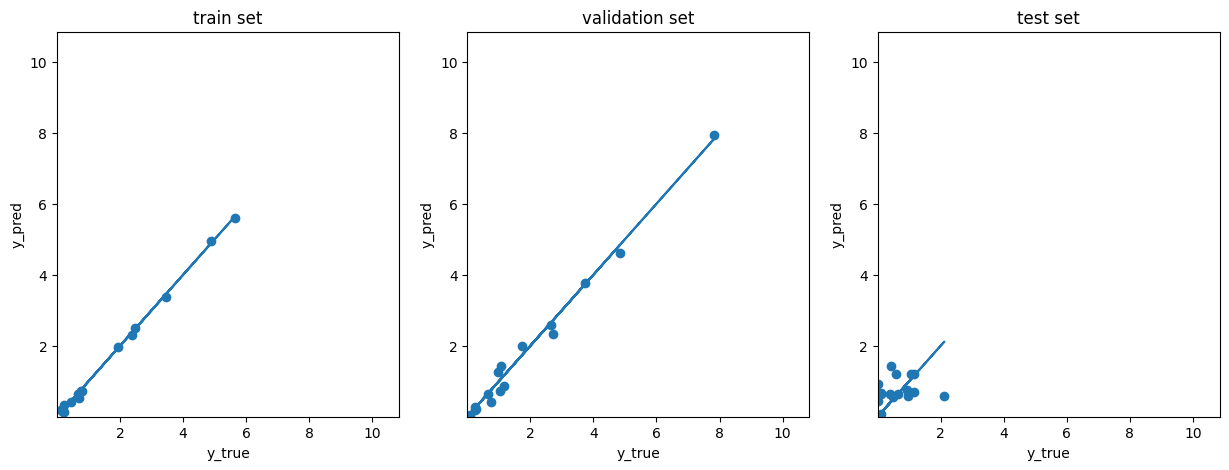

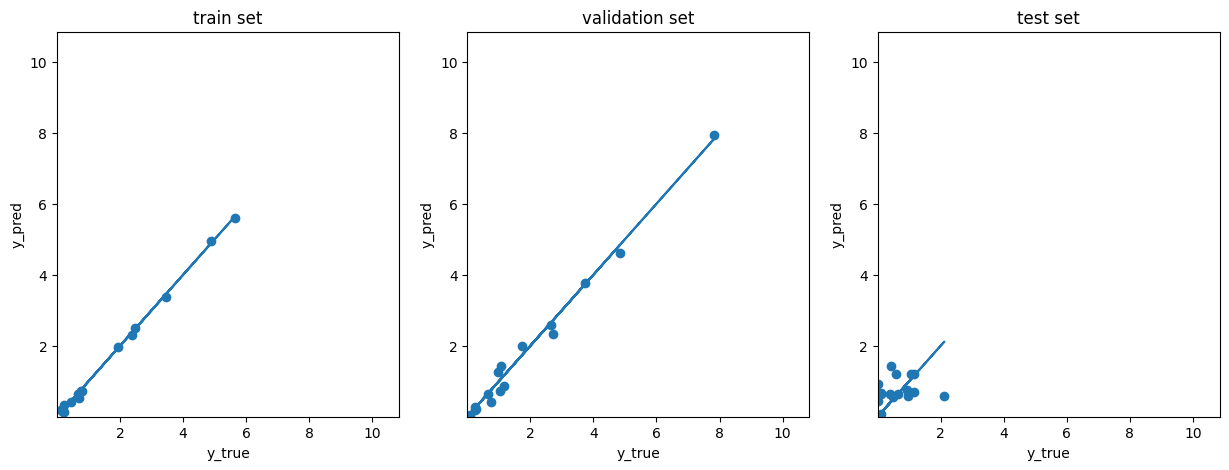

Mean Absolute Error (MAE) on test_set: 0.71087885
Mean Squared Error (MSE) on test_set: 1.362605


(<torch_geometric.loader.dataloader.DataLoader at 0x14ef22860e90>,
 0.71087885,
 1.362605)

In [5]:
import importlib
import torch
import copy

from geom3d.inference_tests import inference_test_models
from geom3d.train_models import *
from geom3d.utils import fragment_scaffold_split
from geom3d.utils import database_utils

import os
os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
config_dir = os.getcwd()+"/fragment_experiment/SchNet_opt_combined_80000"
config = read_config(config_dir)

dataset_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_combined.pt"
dataset = torch.load(dataset_path)

config_dir = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/SchNet_opt_fosc1_80000_3/"
chkpt_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/SchNet_opt_fosc1_80000_3/epoch=95-val_loss=0.32-other_metric=0.00.ckpt"

importlib.reload(inference_test_models)

inference_test_models.plot_training_results(chkpt_path, config_dir)